In [1]:
import pandas as pd
pd.__version__

import matplotlib.pyplot as plt

import matplotlib.patches as patches

import re


# MLB Pitch Analysis

## Project

`This goal of this project is to predict the next pitch based on information about the teams, the pitcher, the batter, 
and the in game situation.`

## Instructions

`Start outlining the way you would go about the model-building process with the goal of predicting the probability
that the next thrown pitch will be a fastball, slider, change-up, etc.`

## Data

`The data given for this project is from the 2011 MLB season.`


In [2]:
data = pd.read_csv("pitches", sep=",")

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1


In [4]:
print(data.shape)

(718961, 125)


## Clean the 2011 MLB data

In [5]:
# There are a number of columns with all nan

data.iloc[0:4, 40:51]

,y,sv_id,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0
0,180.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,170.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,152.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,168.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop the columns with all nan

clean_data = data.dropna(axis='columns', how='all')

print(clean_data.shape)

(718961, 76)


In [7]:
clean_data.columns

Index([u'uid', u'game_pk', u'year', u'date', u'team_id_b', u'team_id_p',
       u'inning', u'top', u'at_bat_num', u'pcount_at_bat', u'pcount_pitcher',
       u'balls', u'strikes', u'fouls', u'outs', u'is_final_pitch',
       u'final_balls', u'final_strikes', u'final_outs', u'start_tfs',
       u'start_tfs_zulu', u'batter_id', u'stand', u'b_height', u'pitcher_id',
       u'p_throws', u'at_bat_des', u'event', u'event2', u'event3', u'event4',
       u'away_team_runs', u'home_team_runs', u'score', u'pitch_des',
       u'pitch_id', u'type', u'pitch_tfs', u'pitch_tfs_zulu', u'x', u'y',
       u'sv_id', u'start_speed', u'end_speed', u'sz_top', u'sz_bot', u'pfx_x',
       u'pfx_z', u'px', u'pz', u'x0', u'z0', u'y0', u'vx0', u'vz0', u'vy0',
       u'ax', u'az', u'ay', u'break_length', u'break_y', u'break_angle',
       u'pitch_type', u'type_confidence', u'zone', u'nasty', u'spin_dir',
       u'spin_rate', u'cc', u'on_1b', u'on_2b', u'on_3b', u'created_at',
       u'added_at', u'modified_at', u'

In [8]:
# Check is there's any column with a nan

print(clean_data.columns[clean_data.isna().any()])

print(clean_data.columns[clean_data.isna().any()].shape)

Index([u'event2', u'event3', u'event4', u'score', u'pitch_tfs',
       u'pitch_tfs_zulu', u'sv_id', u'start_speed', u'end_speed', u'sz_top',
       u'sz_bot', u'pfx_x', u'pfx_z', u'px', u'pz', u'x0', u'z0', u'y0',
       u'vx0', u'vz0', u'vy0', u'ax', u'az', u'ay', u'break_length',
       u'break_y', u'break_angle', u'pitch_type', u'type_confidence', u'zone',
       u'nasty', u'spin_dir', u'spin_rate', u'cc', u'on_1b', u'on_2b',
       u'on_3b'],
      dtype='object')
(37,)


In [9]:
# drop rows with any nan for pitch type

clean_data = clean_data.dropna(axis='rows', how='any', subset=['pitch_type'])

clean_data.shape

(716681, 76)

In [10]:
# drop rows with any nan for type confidence

clean_data = clean_data.dropna(axis='rows', how='any', subset=['type_confidence'])

clean_data.shape

(716681, 76)

## Plot the data
`The plot shows the position of the pitches when crossing home plate. The red box is the estimated strike zone. The
bottom and top bounds of the strike zone (z direction) depend on the batter height. These are averaged from the 2011 
data (1.60 and 3.40). The width of the strike zone is the same as home plate (17 in).`

In [11]:
# The bottom and top bounds of the strike zone (z direction) depend on the batter height
# These are averaged from the 2011 data (1.60 and 3.40)

clean_data["sz_bot"].describe(), clean_data["sz_top"].describe()

(count    716681.000000
 mean          1.600354
 std           0.136247
 min           0.000000
 25%           1.510000
 50%           1.600000
 75%           1.690000
 max           3.150000
 Name: sz_bot, dtype: float64, count    716681.000000
 mean          3.398461
 std           0.206579
 min           0.000000
 25%           3.260000
 50%           3.400000
 75%           3.540000
 max           4.310000
 Name: sz_top, dtype: float64)

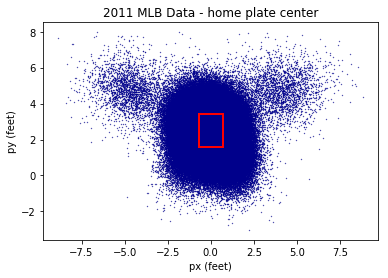

In [12]:
# Create figure and axes
fig, ax = plt.subplots()

ax.scatter(x=clean_data["px"], y=clean_data["pz"], c='DarkBlue', s=0.1)

# Add labels and title
plt.xlabel('px (feet)')
plt.ylabel('py (feet)')
#plt.xlim(-80,125)
#plt.ylim(0,250)
plt.title('2011 MLB Data - home plate center')


# width of the strike zone (same as home plate, 17 in) in feet from inches
width = 17.0/12.0

# Create a rectangle for the strike zone
rect = patches.Rectangle((-1.0*width/2.0, 1.60), width, 3.40-1.60, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the axes
ax.add_patch(rect)

# Show the plot
plt.show()

## Analysis Approach for Pitch Type 

`12 pitch types will be classified based on the descriptions given in the MLB source below. The other 6 pitch types 
in the data (PO, UN, AB, FA, IN, FT) are not specified by that source, but can be added when the abbreviations for 
the pitch type are confirmed.`

- Changeup (CH), Curveball (CU), Cutter (FC), Eephus (EP), Forkball (FO), Four-Seam Fastball (FF), Knuckleball (KN), Knuckle-curve (KC), Screwball (SC), Sinker (SI), Slider (SL), Splitter (FS) 

`With limited information on the source of the type confidence value and how it can be used, it is assumed that values
close to zero are less probable. The data is selected for values greater than 0.1. This can be changed after finding
more information about the source of the type confidence value.`

Sources: <br> 
    
https://www.mlb.com/glossary/pitch-types
    
https://patents.google.com/patent/US8876638B2/en

In [13]:
clean_data['pitch_type'].unique()

array(['FF', 'SL', 'CU', 'SI', 'FC', 'FT', 'KC', 'CH', 'IN', 'KN', 'FS',
       'FA', 'PO', 'FO', 'EP', 'UN', 'SC', 'AB'], dtype=object)

In [14]:
# counts of each pitch type in the data

clean_data['pitch_type'].value_counts()

FF    238541
SL    109756
SI     87740
FT     81056
CH     72641
CU     56379
FC     41702
FS     10503
KC      8490
KN      4450
IN      4058
PO       559
FO       329
FA       204
EP       134
SC       120
UN        17
AB         2
Name: pitch_type, dtype: int64

In [15]:
clean_data['type_confidence'].describe()

count    716681.000000
mean          1.404510
std           0.660533
min           0.000000
25%           0.901000
50%           2.000000
75%           2.000000
max           2.000000
Name: type_confidence, dtype: float64

In [16]:
# select rows where type_confidence > 0.1

t_data = clean_data.loc[clean_data["type_confidence"] > 0.1]

t_data.shape

(667561, 76)

## Selected features in the training data
- The features known prior to the pitch are selected. If we are given the information below, the next chosen pitch will be predicted. <br> <br>
    - Teams: team_id_b, team_id_p 
    - In Game Information: inning, top, at_bat_num, pcount_at_bat, balls, strikes, fouls, outs, away_team_runs, home_team_runs    
    - Batter Information: batter_id, stand, b_height
    - Pitcher Information: pcount_pitcher, pitcher_id, p_throws

In [17]:
# keep the columns with the selected features

t_data = t_data[['team_id_b', 'team_id_p', 'inning', 'top', 'at_bat_num', 'pcount_at_bat', 'pcount_pitcher', 'balls', 'strikes', 'fouls', 'outs', 'batter_id', 'stand', 'b_height', 'pitcher_id', 'p_throws', 'away_team_runs', 'home_team_runs', 'pitch_type']]

t_data.columns

t_data.shape

(667561, 19)

In [18]:
print(t_data)

        team_id_b  team_id_p  inning  top  at_bat_num  pcount_at_bat  \
26            118        108       1    0           7              1   
27            118        108       1    0           7              2   
28            118        108       1    0           7              3   
29            118        108       1    0           7              4   
30            118        108       1    0           7              5   
31            118        108       1    0           7              6   
32            118        108       1    0           7              7   
33            118        108       1    0           7              8   
34            118        108       1    0           7              9   
35            118        108       1    0           8              1   
36            118        108       1    0           8              2   
37            118        108       1    0           8              3   
38            118        108       1    0           8           

## Prepare the training data set

In [19]:
# convert the batter height to inches

def convert_height(x):
        feet = re.findall('^[0-9]', x)[0]
        inches = re.findall('.[0-9]$', x)[0]
        return 12*int(feet) + abs(int(inches)) 
    
t_data['b_height_inches'] = t_data['b_height'].apply(convert_height)

t_data.drop('b_height', axis=1, inplace=True)

print(t_data.shape)

(667561, 19)


In [20]:
# change the left hand (L) and right hand (R) labels to integers for the model trainer
# L = 0, R = 1
    
def hand_to_int(x):
    if x == 'L':
        return 0
    else:
        return 1

t_data['stand'] = t_data['stand'].apply(hand_to_int)

t_data['p_throws'] = t_data['p_throws'].apply(hand_to_int)

print(t_data.shape)

(667561, 19)


In [21]:
print(t_data)

        team_id_b  team_id_p  inning  top  at_bat_num  pcount_at_bat  \
26            118        108       1    0           7              1   
27            118        108       1    0           7              2   
28            118        108       1    0           7              3   
29            118        108       1    0           7              4   
30            118        108       1    0           7              5   
31            118        108       1    0           7              6   
32            118        108       1    0           7              7   
33            118        108       1    0           7              8   
34            118        108       1    0           7              9   
35            118        108       1    0           8              1   
36            118        108       1    0           8              2   
37            118        108       1    0           8              3   
38            118        108       1    0           8           

In [22]:
# check the counts of each pitch type before mapping

t_data['pitch_type'].value_counts()

FF    238540
SL    109755
FT     81056
CH     72587
CU     56379
SI     43481
FC     41702
FS     10503
KC      8490
KN      4450
FO       329
EP       134
SC       120
FA        35
Name: pitch_type, dtype: int64

In [23]:
# remove the pitch types that are not used for this run

t_data = t_data.drop( t_data[t_data['pitch_type'] == 'PO'].index )

t_data = t_data.drop( t_data[t_data['pitch_type'] == 'UN'].index )

t_data = t_data.drop( t_data[t_data['pitch_type'] == 'AB'].index )

t_data = t_data.drop( t_data[t_data['pitch_type'] == 'FA'].index )

t_data = t_data.drop( t_data[t_data['pitch_type'] == 'IN'].index )

t_data = t_data.drop( t_data[t_data['pitch_type'] == 'FT'].index )

t_data.shape

(586470, 19)

In [24]:
# map the pitch types to integers for the model trainer
# FF = 0, SL = 1, SI = 2, CH = 3, CU = 4, FC = 5, FS = 6, KC = 7, KN = 8, FO = 9, EP = 10, SC = 11
    
def pitch_type_to_int(x):
    if x == 'FF':
        return 0
    elif x == 'SL':
        return 1
    elif x == 'SI':
        return 2
    elif x == 'CH':
        return 3
    elif x == 'CU':
        return 4
    elif x == 'FC':
        return 5
    elif x == 'FS':
        return 6
    elif x == 'KC':
        return 7
    elif x == 'KN':
        return 8
    elif x == 'FO':
        return 9
    elif x == 'EP':
        return 10
    else:
        return 11

t_data['pitch_type'] = t_data['pitch_type'].apply(pitch_type_to_int)

print(t_data.shape)


(586470, 19)


In [25]:
# check the counts of each pitch type after the mapping

t_data['pitch_type'].value_counts()

0     238540
1     109755
3      72587
4      56379
2      43481
5      41702
6      10503
7       8490
8       4450
9        329
10       134
11       120
Name: pitch_type, dtype: int64

In [26]:
print(t_data)

        team_id_b  team_id_p  inning  top  at_bat_num  pcount_at_bat  \
26            118        108       1    0           7              1   
27            118        108       1    0           7              2   
28            118        108       1    0           7              3   
29            118        108       1    0           7              4   
30            118        108       1    0           7              5   
31            118        108       1    0           7              6   
32            118        108       1    0           7              7   
33            118        108       1    0           7              8   
34            118        108       1    0           7              9   
35            118        108       1    0           8              1   
36            118        108       1    0           8              2   
37            118        108       1    0           8              3   
38            118        108       1    0           8           

In [27]:
# Check is there's any column with nan

print(t_data.columns[t_data.isna().any()])

print(t_data.columns[t_data.isna().any()].shape)

Index([], dtype='object')
(0,)


## Train the model with a classifier

In [28]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = t_data.drop('pitch_type', axis=1)
y = t_data['pitch_type'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, y.shape)

((586470, 18), (586470,))


In [29]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model = XGBClassifier(objective='multi:softprob')

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Evaluation of the model

In [30]:
# Predict the probability of each pitch type by running the model on the test data
# FF = 0, SL = 1, SI = 2, CH = 3, CU = 4, FC = 5, FS = 6, KC = 7, KN = 8, FO = 9, EP = 10, SC = 11


y_pred_proba = model.predict_proba(X_test)

print(y_pred_proba)

print(y_pred_proba.shape)

[[3.7580019e-01 3.5073698e-01 4.6715662e-02 ... 4.3667917e-04
  4.4313894e-04 4.3852624e-04]
 [3.3570987e-01 1.5625291e-01 5.9933510e-02 ... 4.0497191e-04
  4.1096250e-04 4.0668473e-04]
 [3.2782006e-01 2.4530700e-01 6.9263332e-02 ... 5.3830916e-04
  5.4627244e-04 5.4058619e-04]
 ...
 [7.9692090e-01 3.8869262e-02 1.1603139e-02 ... 3.3923329e-04
  3.2681198e-04 2.6137804e-04]
 [3.3213252e-01 2.2384083e-01 5.9798356e-02 ... 5.4626697e-04
  5.5434764e-04 5.4857734e-04]
 [1.9942243e-01 5.6509621e-02 6.6758096e-02 ... 4.0967594e-04
  5.0580554e-04 4.1140846e-04]]
(117294, 12)


In [31]:
# Calculate the accuracy

accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.22%


//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
# Predict the most likely class by running the model on the test data

y_pred = model.predict(X_test)

print(y_pred.shape)

print(y_pred)

(117294,)
[0 0 0 ... 0 0 4]


//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
from sklearn.metrics import classification_report

# Print the classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.44      0.95      0.60     47498
          1       0.41      0.11      0.18     22052
          2       0.53      0.09      0.15      8802
          3       0.41      0.05      0.10     14382
          4       0.53      0.02      0.05     11271
          5       0.57      0.15      0.24      8391
          6       0.00      0.00      0.00      2129
          7       0.50      0.14      0.22      1714
          8       0.81      1.00      0.90       940
          9       0.88      0.20      0.33        74
         10       0.00      0.00      0.00        23
         11       0.56      0.50      0.53        18

avg / total       0.45      0.44      0.33    117294



//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
